In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Get the dataset
loans= pd.read_csv('loan_data.csv')

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Exploratory Data Analysis

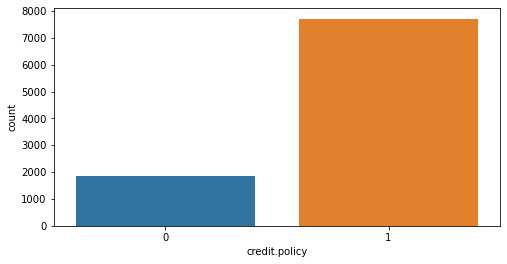

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x='credit.policy', data=loans)
plt.show()

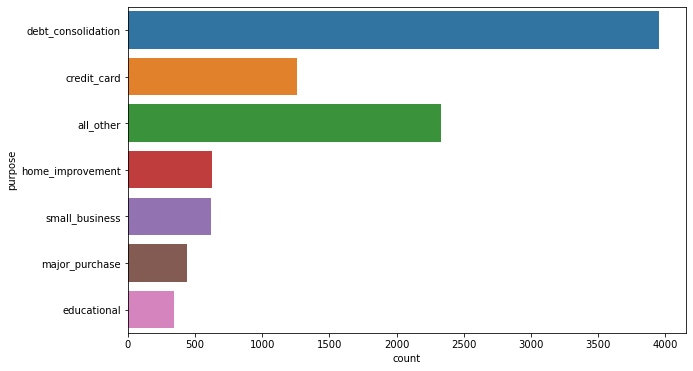

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(y='purpose', data=loans)
plt.show()

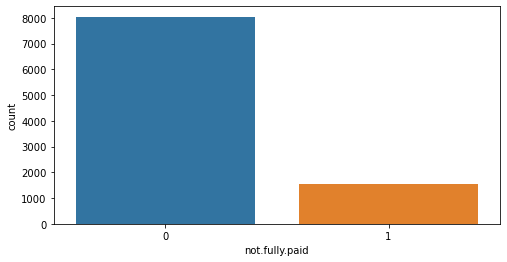

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x='not.fully.paid', data=loans)
plt.show()

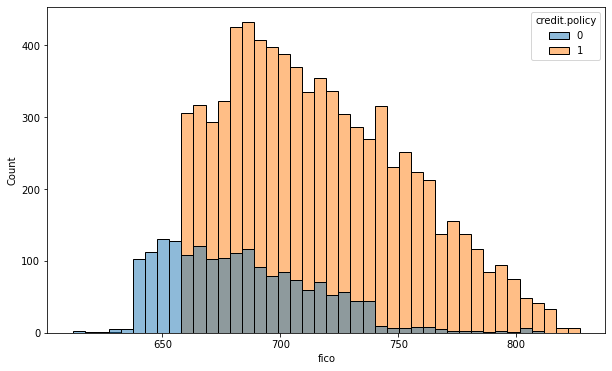

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico', hue='credit.policy', data=loans)
plt.show()

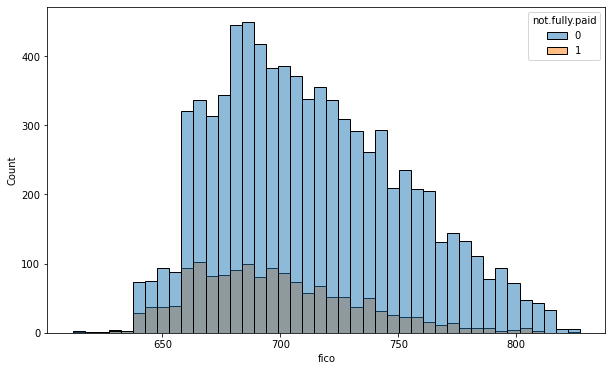

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico', hue='not.fully.paid', data=loans)
plt.show()

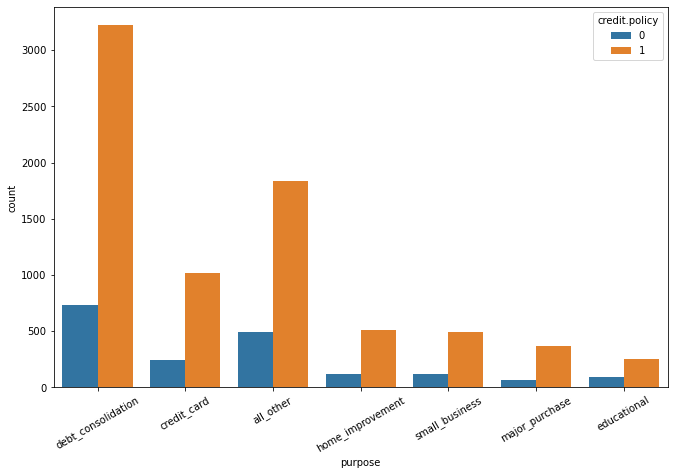

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='credit.policy',data=loans)
plt.xticks(rotation=30)
plt.show()


<AxesSubplot:>

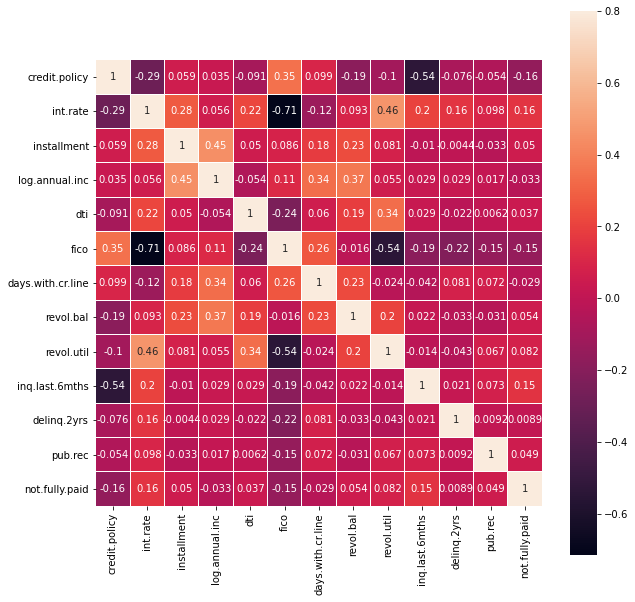

In [12]:
corr = loans.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

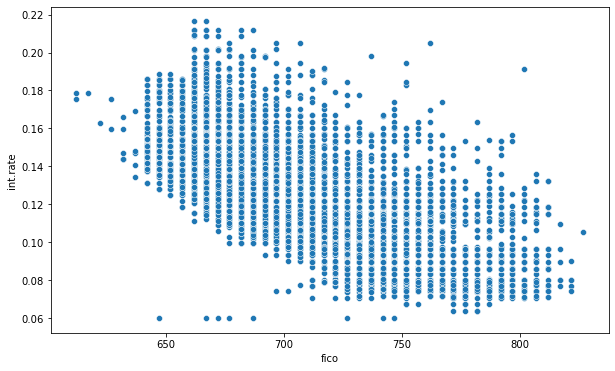

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='fico', y='int.rate', data=loans)
plt.show()

<Figure size 864x576 with 0 Axes>

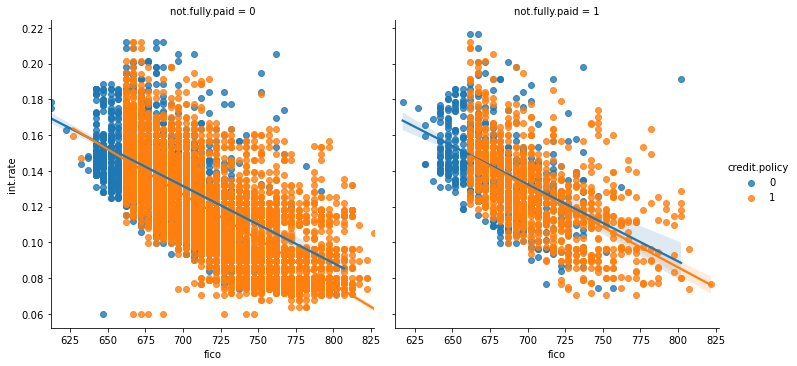

In [14]:
plt.figure(figsize=(12,8))
sns.lmplot(x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', data=loans)
plt.show()

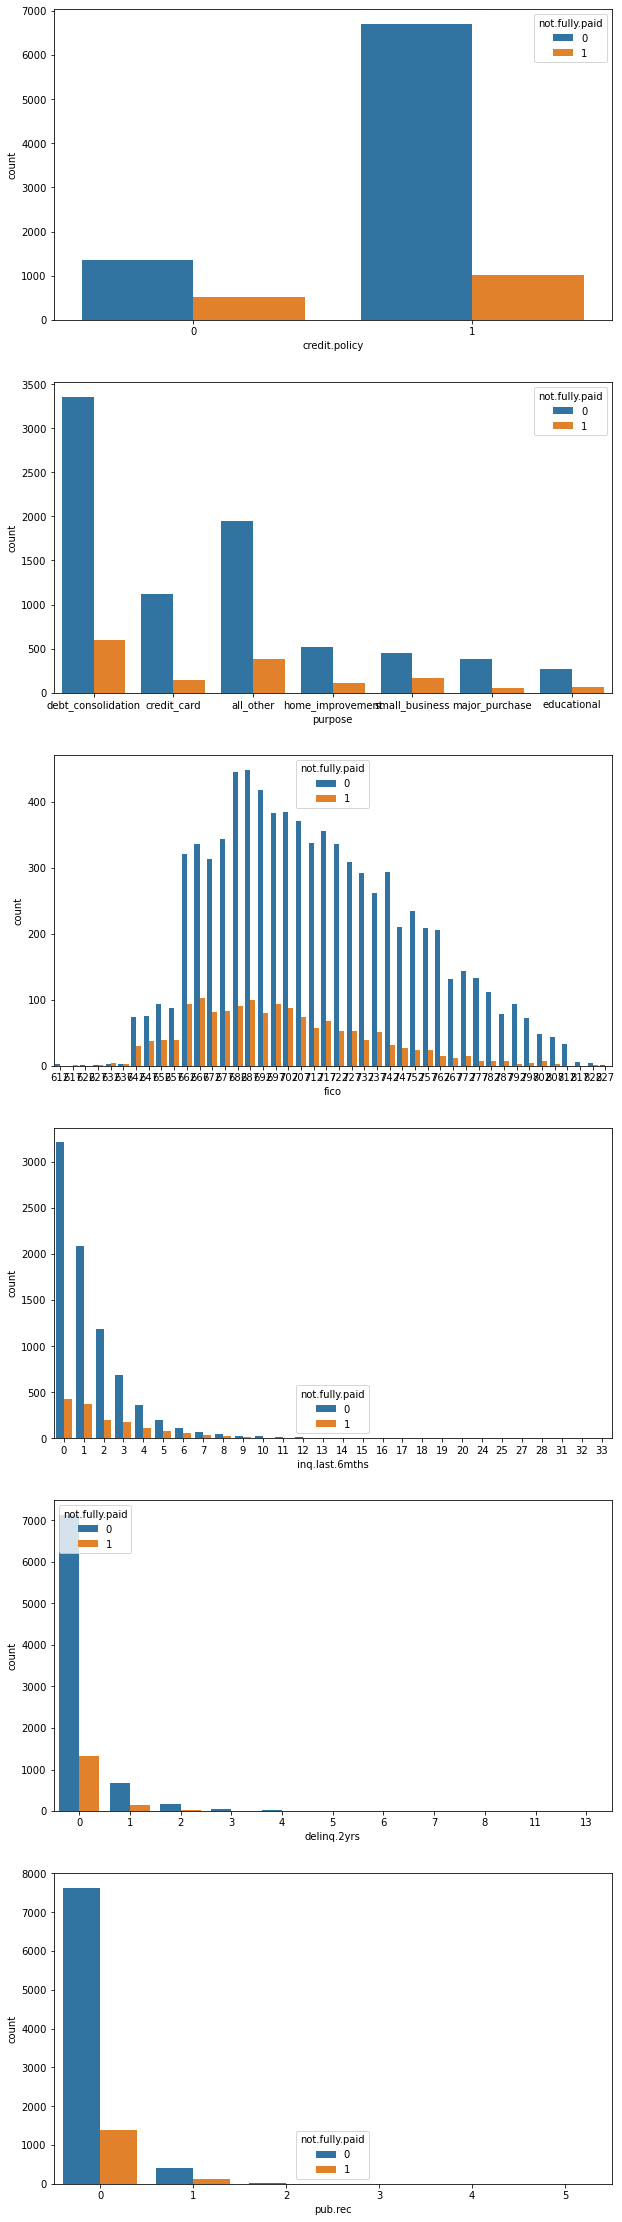

In [15]:
categorical_columns = ['credit.policy', 'purpose', 'fico', 'inq.last.6mths', 'delinq.2yrs','pub.rec']
fig,axes = plt.subplots(6,1,figsize=(10,40))
for idx,cat_col in enumerate(categorical_columns):
    sns.countplot(x=cat_col,data=loans,hue='not.fully.paid',ax=axes[idx])
    




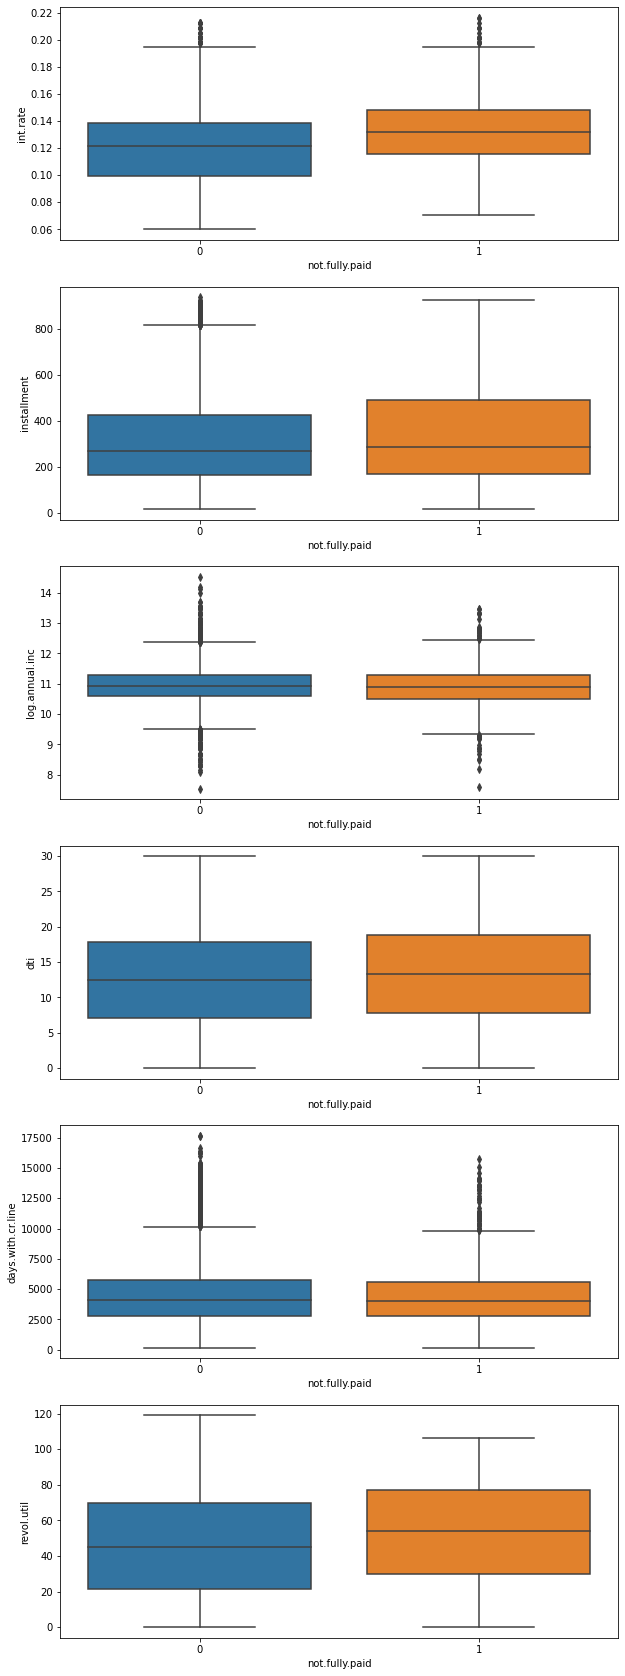

In [16]:
numerical_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'days.with.cr.line', 'revol.util']
fig,axes = plt.subplots(6,1,figsize=(10,30))
for idx,num_col in enumerate(numerical_columns):
    sns.boxplot(y=num_col,data= loans,x='not.fully.paid',ax=axes[idx])

In [17]:
# get dummies for the purpose column
loans_withdummies = pd.get_dummies(loans,columns=['purpose'],drop_first=True)
loans_withdummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Model: Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict


In [21]:
# Define X and Y
X=loans_withdummies.drop(['not.fully.paid'], axis=1)
y=loans_withdummies['not.fully.paid']

In [22]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
4845              1    0.1426       548.90       10.714418  14.67   682   
6910              1    0.0774       312.19       10.819778   0.86   772   
8146              0    0.1520       208.59       10.491274  18.53   642   
7113              1    0.1385       511.56       10.950807  12.74   682   
195               1    0.1059       130.18       11.034890  17.81   682   
...             ...       ...          ...             ...    ...   ...   
599               1    0.1671       710.18       11.082143  20.09   662   
5695              1    0.1496       164.57       10.162770  22.36   662   
8006              0    0.1659       531.74       10.616437  20.53   652   
1361              1    0.0907       238.75       11.002100   4.86   752   
1547              1    0.0800       142.59       10.978490   5.58   757   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
4845        3959.958

In [24]:
# Build and fit our model of logistic regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [25]:
#Generate predictions
y_pred = logreg.predict(X_test)

In [26]:
# Let's see the scores
accuracy_score(y_test,y_pred)

0.8469032707028532

In [27]:
f1_score(y_test,y_pred)

0.039301310043668124

In [28]:
# confusion matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2425,6,2431
1,434,9,443
All,2859,15,2874


In [29]:
# Let's see the whole report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [30]:
print("Validation Mean F1 Score: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(logreg,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.4658272778052428
Validation Mean Accuracy:  0.8359187285051254


0.5089239534864285


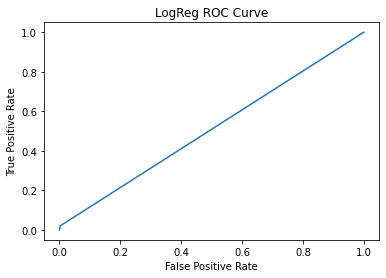

In [31]:
print(roc_auc_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LogReg ROC Curve")
plt.show()